In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0305/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 465 ms, sys: 15.5 ms, total: 481 ms
Wall time: 483 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,0.027815,0.0,0.116108,0.0,-0.009122,0.0,-0.038291,0.0,-0.005659,...,0.001227,0.037232,0.0,-0.013367,0.0,-0.011087,0.0,-0.005968,0.0,-0.004036
1,0.0,0.032823,0.0,0.129100,0.0,-0.005775,0.0,-0.021014,0.0,0.001228,...,0.000000,0.023543,0.0,-0.006859,0.0,-0.008310,0.0,-0.004277,0.0,0.005629
2,0.0,0.056064,0.0,0.132815,0.0,-0.009501,0.0,-0.022101,0.0,-0.000251,...,0.000000,0.020452,0.0,-0.011871,0.0,-0.021084,0.0,-0.006889,0.0,-0.004282
3,0.0,0.007303,0.0,0.091270,0.0,-0.006199,0.0,-0.004520,0.0,0.004552,...,0.000000,-0.002861,0.0,0.007962,0.0,0.010960,0.0,0.000490,0.0,0.004070
4,0.0,0.018150,0.0,0.080838,0.0,-0.001131,0.0,-0.009265,0.0,-0.000666,...,0.000000,-0.006365,0.0,0.000253,0.0,0.006907,0.0,-0.002572,0.0,0.006326


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000002,0.051862,0.001227,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000006,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,2.054415e-08,0.000658,0.000015,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.004724,0.008987,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.017631,0.004754,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000002,0.053230,0.001228,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000006,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,2.054415e-08,0.000659,0.000015,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.004735,9.027359e-03,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.017787,0.004765,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.110501,0.853825,4.700175e-07,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000337,0.000337,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    46.000000
1    35.000000
2    37.000000
3    30.000651
4    35.001190
5    28.999994
6    20.000018
dtype: float64

In [26]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    # sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 154 ms, sys: 52.1 ms, total: 206 ms
Wall time: 206 ms


In [27]:
len(catch_all_averaged_preds)

910

In [28]:
catch_all_averaged_preds[0]

array([0.0477912 , 0.05278588, 0.07520655, 0.02462578, 0.03637164,
       0.06769945, 0.04138076], dtype=float32)

In [29]:
# make this a dataframe

In [30]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [31]:
Forecasted_values_df.shape

(7, 910)

In [32]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [33]:
sum_forecasted_values

0    31.570730
1    31.022400
2    32.734154
3    44.440876
4    38.827667
5    42.449295
6    50.487061
dtype: float32

In [34]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [35]:
# concatenate the sum dataframes
block_0305_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0305_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0305_true_and_forecasted_values_df

,True_count,Forecasted_count
0,46.000000,31.570730
1,35.000000,31.022400
2,37.000000,32.734154
3,30.000651,44.440876
4,35.001190,38.827667
5,28.999994,42.449295
6,20.000018,50.487061


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

15.003466493975932

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

12.125108860870862

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.8860136831483068, pvalue=0.007916568185462476)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-3.073153369701509

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 247 ms, sys: 65.1 ms, total: 312 ms
Wall time: 314 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[ 0.1099727 ,  0.0682601 ,  0.21985084, ...,  0.3441561 ,
         0.08449273, -0.02298635],
       [ 0.10280606, -0.03007998, -0.06296661, ...,  0.02928661,
         0.04545432,  0.25975958],
       [ 0.13054751,  0.06578678, -0.05369537, ..., -0.00512356,
         0.06902935, -0.09594566],
       ...,
       [ 0.0200678 , -0.05620186,  0.06972015, ..., -0.04771677,
         0.1694051 , -0.0649398 ],
       [ 0.07198034,  0.19407852,  0.332027  , ..., -0.01181427,
         0.11002061,  0.06723988],
       [-0.04271664,  0.22871205,  0.17084828, ..., -0.08267887,
         0.20142695,  0.16931579]], dtype=float32)

In [51]:
# %%time
# # convert less than 0 entries to 0 for all arrays
# for arr in loaded_npy_files:
#     arr[arr < 0] = 0

In [52]:
loaded_npy_files[0]

array([[ 0.1099727 ,  0.0682601 ,  0.21985084, ...,  0.3441561 ,
         0.08449273, -0.02298635],
       [ 0.10280606, -0.03007998, -0.06296661, ...,  0.02928661,
         0.04545432,  0.25975958],
       [ 0.13054751,  0.06578678, -0.05369537, ..., -0.00512356,
         0.06902935, -0.09594566],
       ...,
       [ 0.0200678 , -0.05620186,  0.06972015, ..., -0.04771677,
         0.1694051 , -0.0649398 ],
       [ 0.07198034,  0.19407852,  0.332027  , ..., -0.01181427,
         0.11002061,  0.06723988],
       [-0.04271664,  0.22871205,  0.17084828, ..., -0.08267887,
         0.20142695,  0.16931579]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[39.502056, 38.630825, 41.31842 , ..., 33.987625, 32.27816 ,
        35.921482],
       [34.717182, 27.741386, 33.806374, ..., 45.87065 , 48.360695,
        79.687126],
       [35.980186, 34.906303, 34.832638, ..., 30.324532, 36.857307,
        32.24913 ],
       ...,
       [34.231842, 35.14491 , 37.037586, ..., 60.953384, 58.28719 ,
        88.001816],
       [37.637207, 36.7253  , 51.1233  , ..., 80.874886, 65.194626,
        76.99541 ],
       [33.828197, 40.21974 , 52.76072 , ..., 58.058186, 60.859848,
        67.981346]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[39.502056, 38.630825, 41.31842 , ..., 33.987625, 32.27816 ,
        35.921482],
       [34.717182, 27.741386, 33.806374, ..., 45.87065 , 48.360695,
        79.687126],
       [35.980186, 34.906303, 34.832638, ..., 30.324532, 36.857307,
        32.24913 ],
       ...,
       [34.231842, 35.14491 , 37.037586, ..., 60.953384, 58.28719 ,
        88.001816],
       [37.637207, 36.7253  , 51.1233  , ..., 80.874886, 65.194626,
        76.99541 ],
       [33.828197, 40.21974 , 52.76072 , ..., 58.058186, 60.859848,
        67.981346]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[16.11805601],
       [17.01985579],
       [17.22834463],
       [20.73270135],
       [17.35079579],
       [23.05706139],
       [24.86720181]])

In [63]:
ui_train

array([[48.44918623],
       [44.8573307 ],
       [48.20716848],
       [75.74436207],
       [74.4300312 ],
       [65.5320797 ],
       [97.19307652]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

45.434174019949765

In [66]:
y_traina = block_0305_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[45.99999969],
       [35.00000025],
       [37.        ],
       [30.00065141],
       [35.00118965],
       [28.99999375],
       [20.00001807]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.8571428571428571

In [70]:
np.mean(output, axis = 0)

array([31.570702, 31.022413, 32.734154, 44.44088 , 38.827644, 42.449303,
       50.487095], dtype=float32)

In [71]:
sum_forecasted_values

0    31.570730
1    31.022400
2    32.734154
3    44.440876
4    38.827667
5    42.449295
6    50.487061
dtype: float32

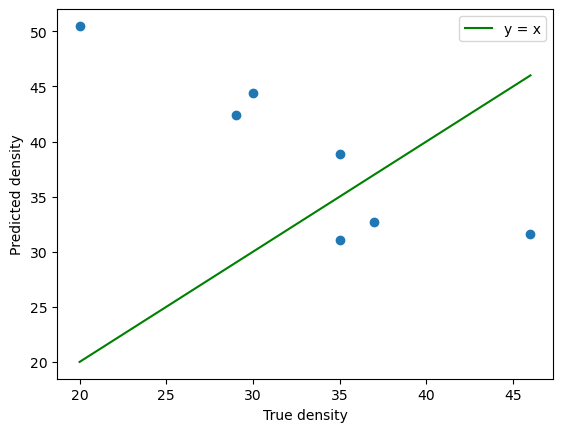

In [72]:
plt.scatter(block_0305_true_and_forecasted_values_df['True_count'], block_0305_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([20, 46], [20, 46], color='green', label='y = x')
plt.legend()
plt.show()

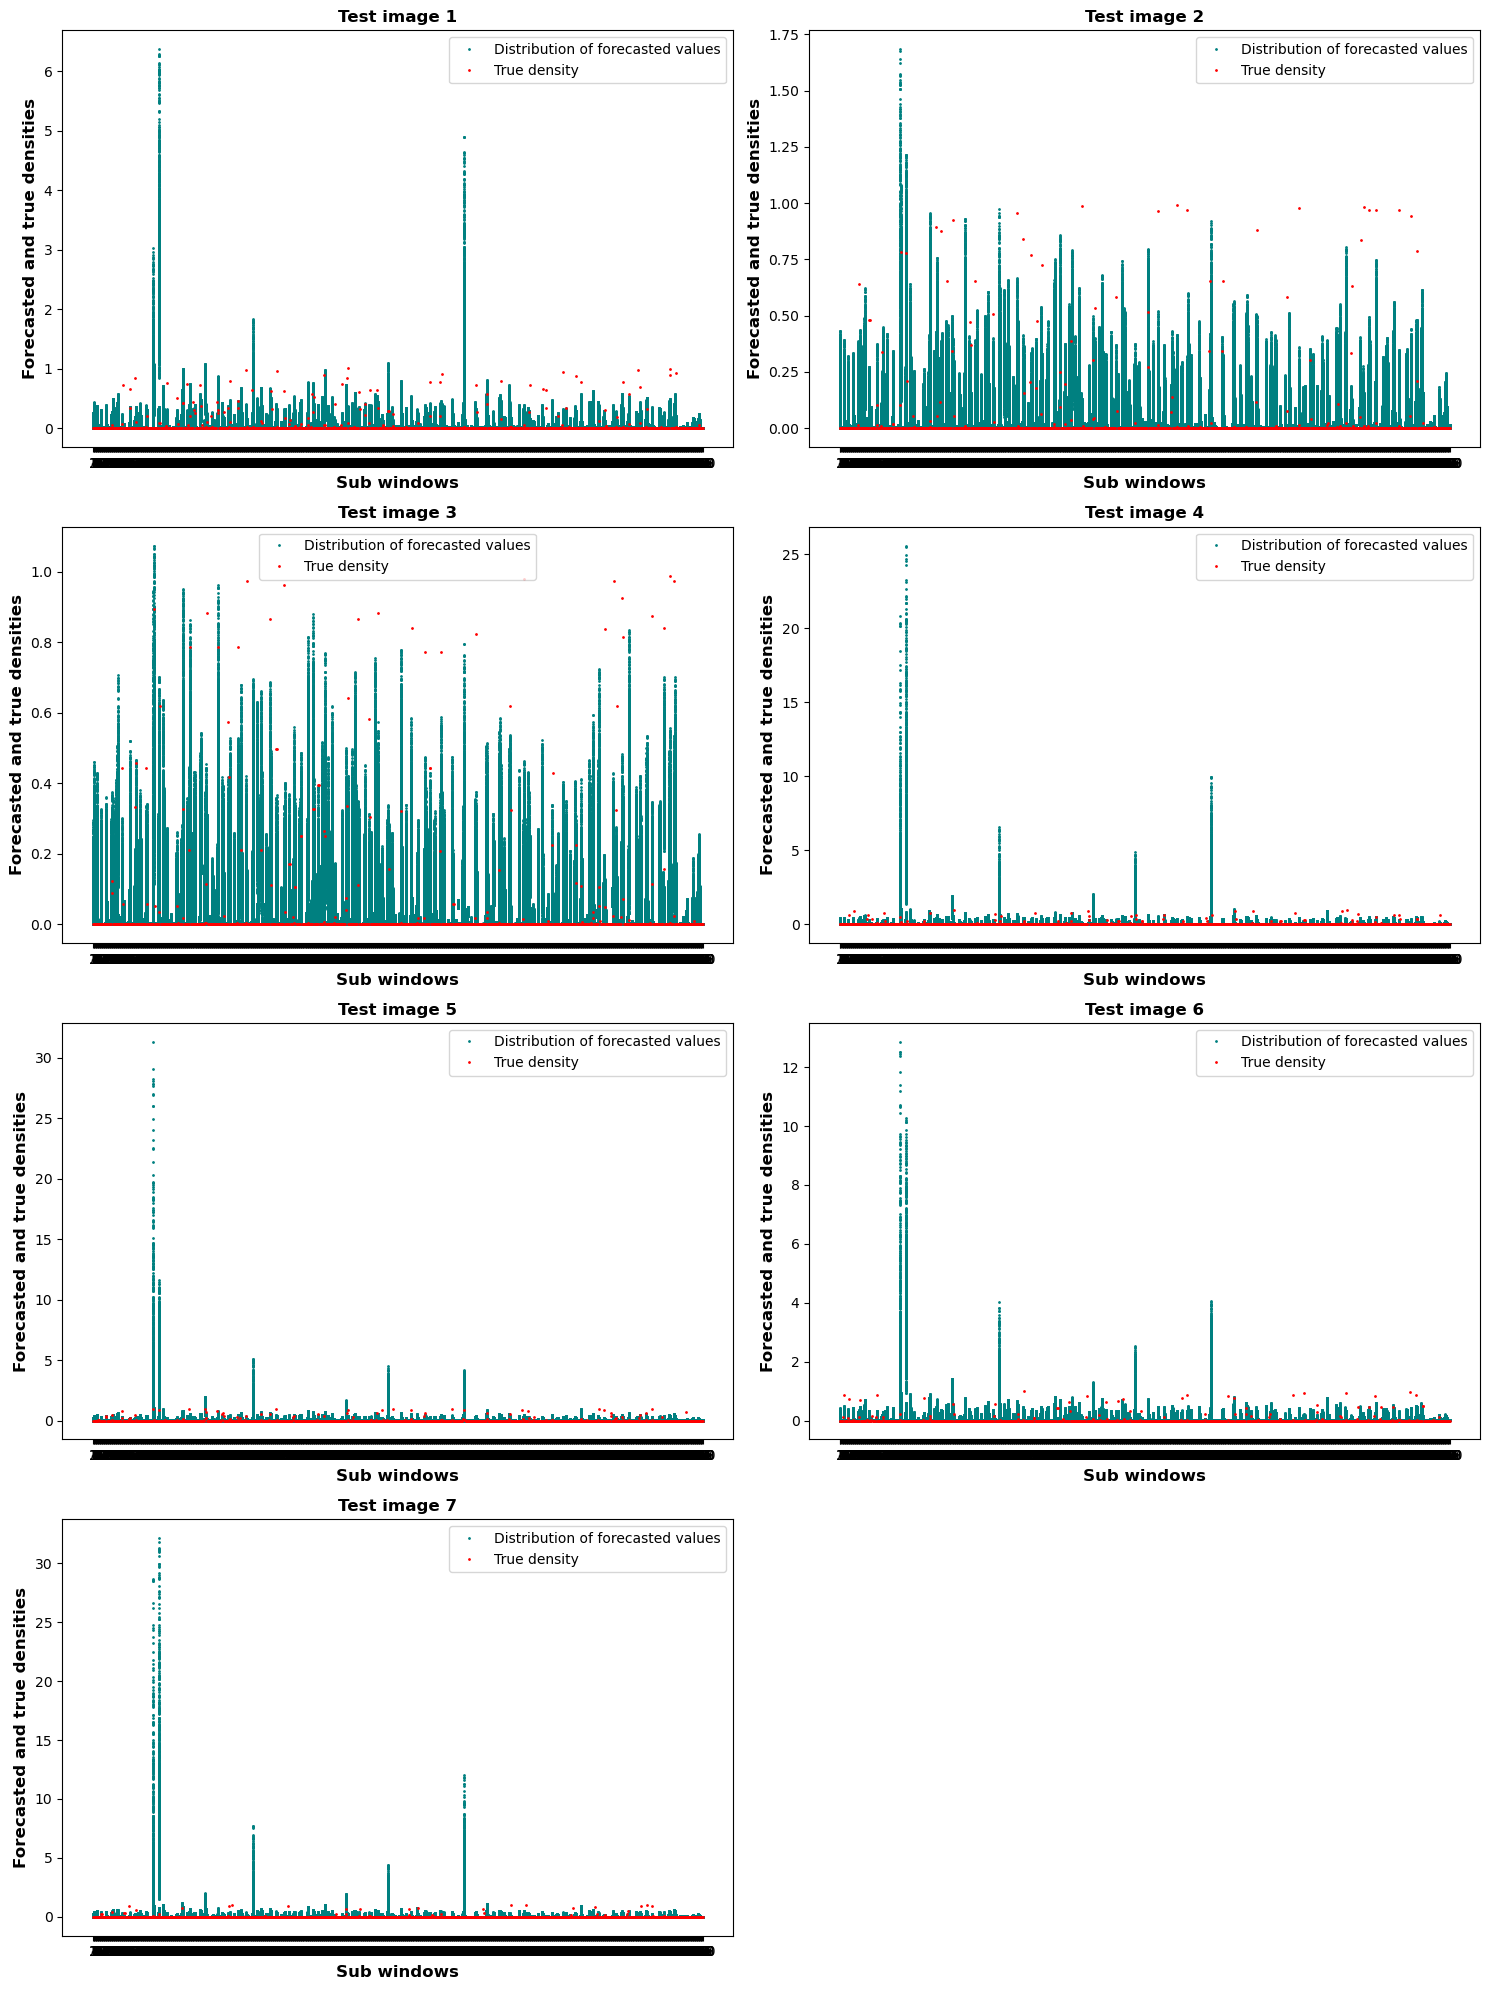

CPU times: user 30.4 s, sys: 978 ms, total: 31.4 s
Wall time: 30.9 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 